# The lapidarist problem


* [Introduction to the problem](#1)
* [Profiling of data completeness and quality](#2)
* [Descriptive analysis and summary statistics](#3)
* [Hypotheses and Modeling](#4)
* [Conclusion and next steps](#5)



# Introduction to the problem <a id="1"></a>

The limousine comes to a full stop. As the driver gets out to open the door you take a deep breath and get inside. You enter 10 Downing Street and are conducted to the usual meeting room. Inside you find the Prime Minister, accompanied by a fat, tall man and a short, deform one with long ears and an even longer nose.

Prime Minister: “Ah! You’re here! Great! Let me introduce my guests. This is Fidelious, Minister of Magic, and Krenk, the owner of the Gringotts Wizarding Bank.”

You: “Uhhh, ma’am, is this a joke?”

Fidelious: “Not at all, but don’t worry, don’t sweat the details, tomorrow you won’t remember anything. Security measures, you see.”

Krenk: “Let’s move things along. I don’t like to be exposed to Muggles.”

You: “What...” The Prime Minister interrupts you.

Prime Minister: “Our friends here seem to have run into a bit of an issue, see, some diamonds seem to have been stolen. Problem is, the only person... goblin, sorry“ he says apologetically to Krenk ” to have seen them is our distinguished guest, Krenk.”

Fidelious: “And while the Ministry completely believes Krenk as to the diamonds’ worth, we need another person to validate his claim. Safety policies, you see.”

Prime Minister: “So, since you’re the best data scientist in our country, I thought you could help. Mr. Krenk will provide you with the characteristics of the missing diamonds and we need you to create a model to value them.”

You: “But I’m not a lapidarist.”

Prime Minister: “Which is why we’re providing you with a huge dataset, containing characteristics and valuations for tens of thousands of diamonds. Now, get working.“

“Huge? Tens of thousands?“ You think. “And I thought I was the clueless one here.”

###### As the problem requires to predict a real value, a regressor will be implmented. For this task, different approaches will be explored in order to find the one that that leads to the best performance. 

# Profiling of data completeness and quality <a id="2"></a>


In [190]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


### Loading the dataset

In [191]:
diamonds = pd.read_csv('./diamonds/diamonds_data.csv')

In [192]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 10 columns):
carat      53930 non-null float64
cut        53930 non-null object
color      53930 non-null object
clarity    53930 non-null object
depth      53930 non-null float64
table      53930 non-null float64
price      53930 non-null int64
x          53930 non-null float64
y          53930 non-null float64
z          53930 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Description of the features

<strong>carat</strong>: Carat weight of the diamond.

<strong>cut</strong>:  Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal.

<strong>color</strong>: Color of the diamond, with D being the best and J the worst.

<strong>clarity</strong>: How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level
inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3.
depth: 

<strong>depth %</strong> :The height of a diamond, measured from the culet to the table, divided by its average girdle  diameter.

<strong>table</strong>: table%: The width of the diamond's table expressed as a percentage of its average diameter.

<strong>price</strong>: he price of the diamond in muggle money.

<strong>x</strong>: length of the diamond in mm.

<strong>y</strong>: width of the diamond in mm.

<strong>z</strong>: depth of the diamond in mm.
    
    
    

In [12]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Number of examples in the dataset

In [195]:
diamonds.shape[0]

53930

### Looking for lost values

In [199]:
diamonds[['x','y','z']] = diamonds[['x','y','z']].replace(0,np.NaN)
diamonds.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

### Dealing with lost values 

As the number of loss values is less than 0.1% of the data, we can drop the rows that contain loss values. 

In [200]:
diamonds.dropna(inplace=True)

Number of examples in the dataset after dealing with lost values

In [201]:
diamonds.shape[0]

53910

### Exploring the categorical variables. 

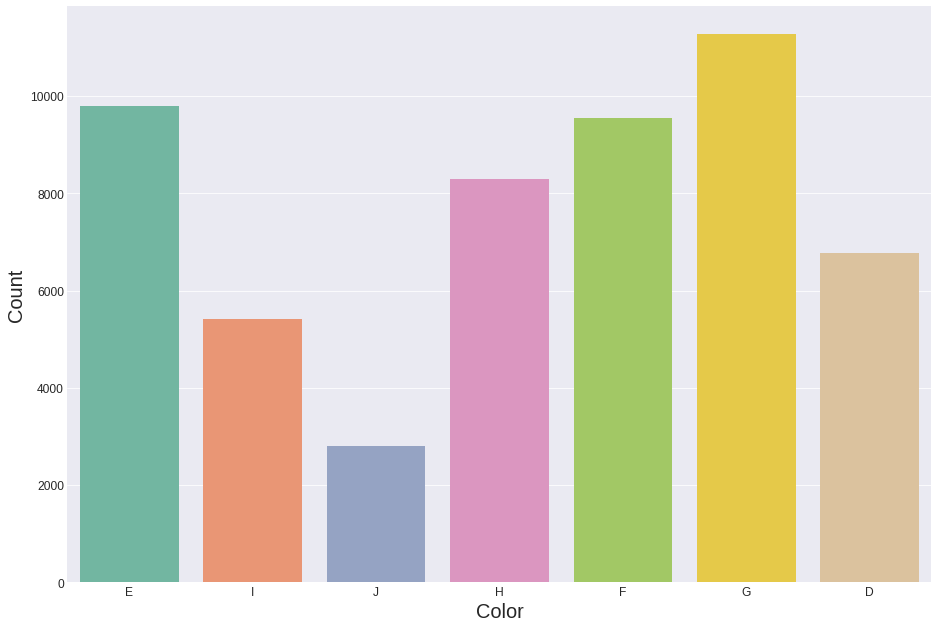

In [31]:
fig=plt.figure()
plt.style.use('seaborn-darkgrid')
axes=fig.add_axes([0.1,0.1,2,2])
ax = sns.countplot(x="color", data = diamonds,  palette="Set2")
plt.xlabel('Color',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

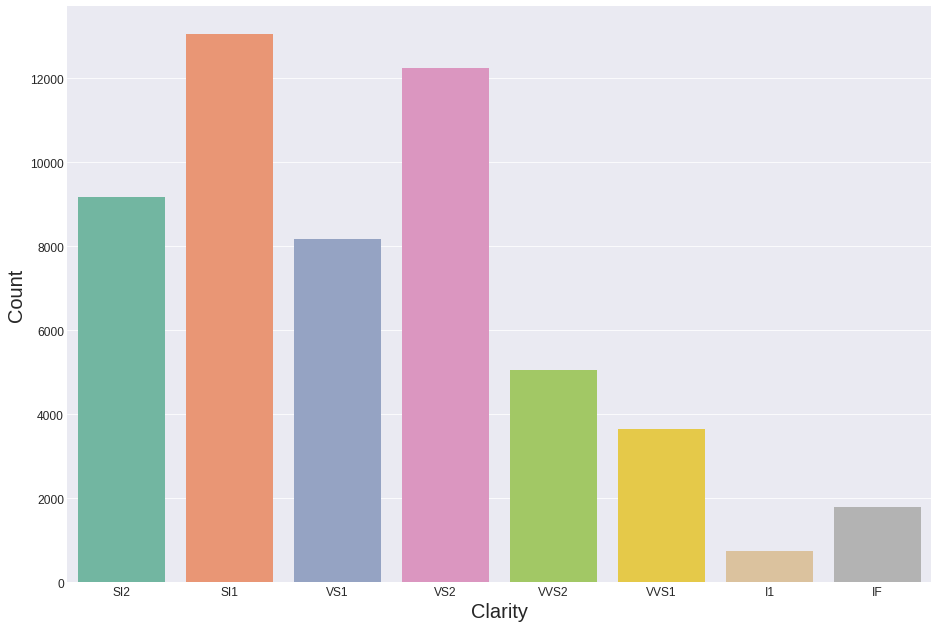

In [33]:
cout

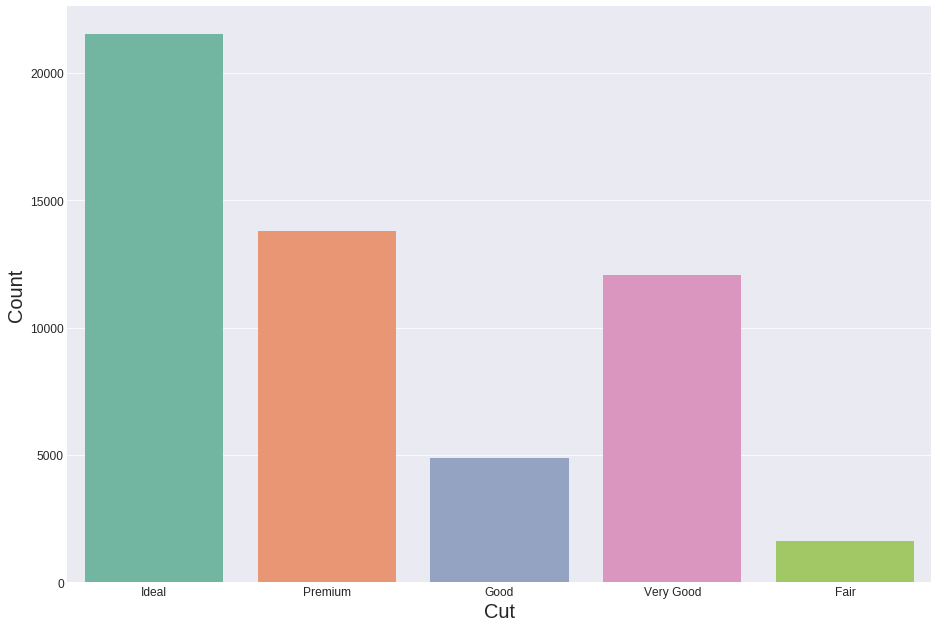

In [35]:
fig=plt.figure()
plt.style.use('seaborn-darkgrid')
axes=fig.add_axes([0.1,0.1,2,2])
ax = sns.countplot(x="cut", data = diamonds,  palette="Set2")
plt.xlabel('Cut',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

For most of the regression methods, it is better to deal with numerical variables. That is why it is necessary to encode the categorical features of the dataset into numerical ones. 

### Getting rid of categorical features. 

The one-hot vector encoding will be used. This encoding creates m new binary feature for each different categorical feature with m different values.

#### Aspect of the new dataset with numerical features. 

In [36]:
diamonds_one_hot =  pd.get_dummies(diamonds)
diamonds_one_hot.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [275]:
diamonds_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53910 entries, 0 to 53929
Data columns (total 27 columns):
carat            53910 non-null float64
depth            53910 non-null float64
table            53910 non-null float64
price            53910 non-null int64
x                53910 non-null float64
y                53910 non-null float64
z                53910 non-null float64
cut_Fair         53910 non-null uint8
cut_Good         53910 non-null uint8
cut_Ideal        53910 non-null uint8
cut_Premium      53910 non-null uint8
cut_Very Good    53910 non-null uint8
color_D          53910 non-null uint8
color_E          53910 non-null uint8
color_F          53910 non-null uint8
color_G          53910 non-null uint8
color_H          53910 non-null uint8
color_I          53910 non-null uint8
color_J          53910 non-null uint8
clarity_I1       53910 non-null uint8
clarity_IF       53910 non-null uint8
clarity_SI1      53910 non-null uint8
clarity_SI2      53910 non-null uint8
clari

# Descriptive analysis and summary statistics <a id="3"></a>

General statistics of the numerical features in thedataset are presented in the following table and histograms of these features in the following figure. 

In [204]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000
mean,0.797734,61.749434,57.456978,3931.248210,5.731706,5.734962,3.540089
std,0.473819,1.432420,2.234152,3987.469164,1.119469,1.140175,0.702560
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Describing the dataset with the one-hot encoding 

In [274]:
diamonds_one_hot.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,...,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.00000,53910.000000
mean,0.797734,61.749434,57.456978,3931.248210,5.731706,5.734962,3.540089,0.029846,0.090892,0.399610,...,0.100519,0.052068,0.013689,0.033203,0.242311,0.170358,0.151475,0.227268,0.06778,0.093916
std,0.473819,1.432420,2.234152,3987.469164,1.119469,1.140175,0.702560,0.170164,0.287458,0.489823,...,0.300694,0.222167,0.116200,0.179169,0.428486,0.375950,0.358514,0.419071,0.25137,0.291714
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


### Histograms of numerical features. 

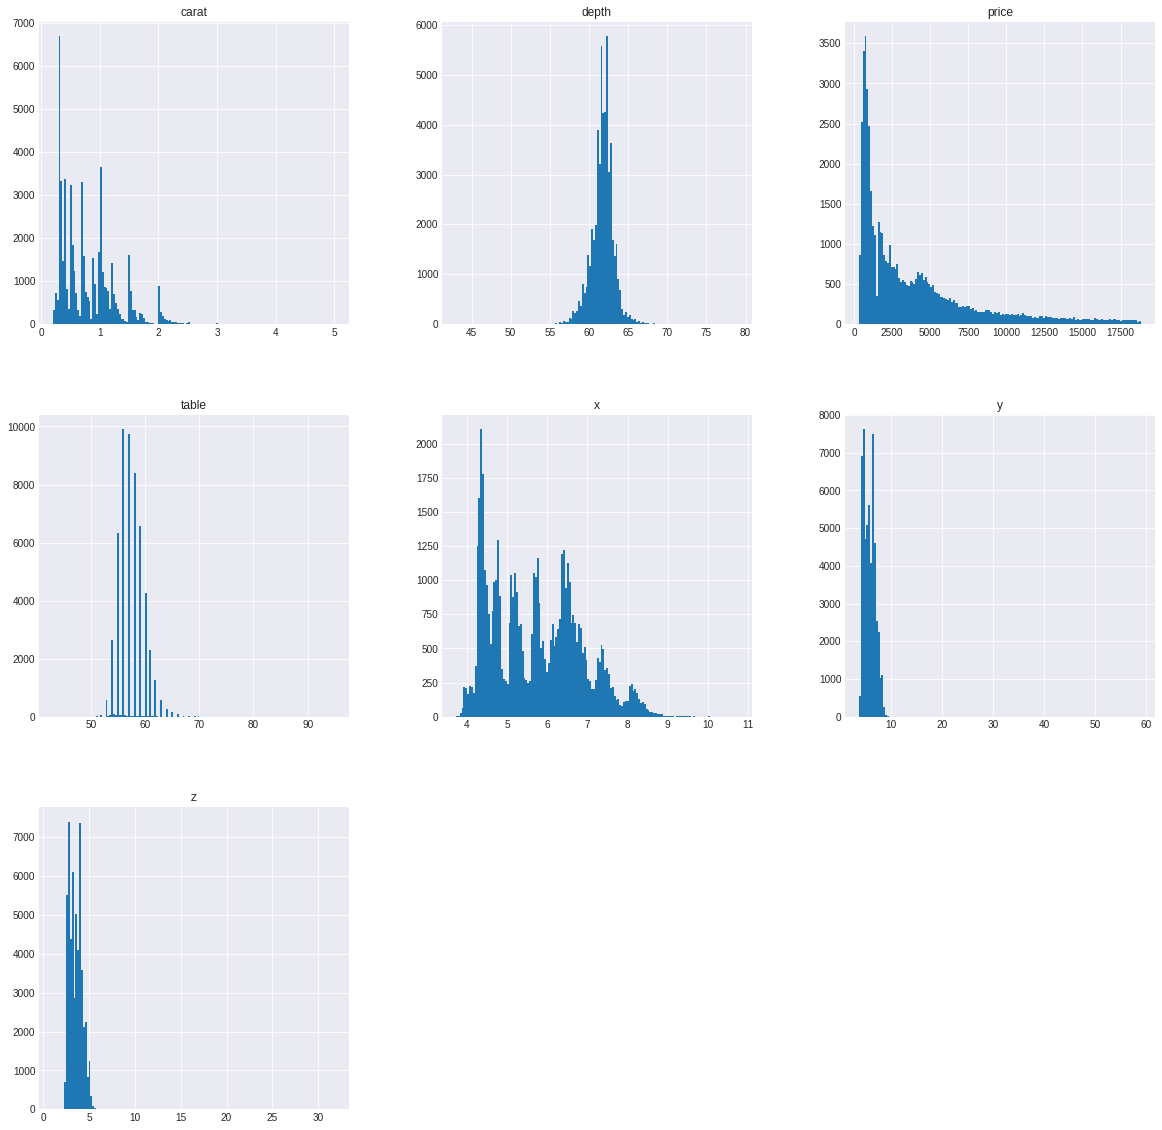

In [207]:
diamonds.hist(figsize = (20,20),bins=150);


#### Correlations

Some features are more related to the variable of interest. To illustrate this, a heatmap depicting the correlation within features is created. Red values show more positive correlations and blue values represent anticorrelations. 

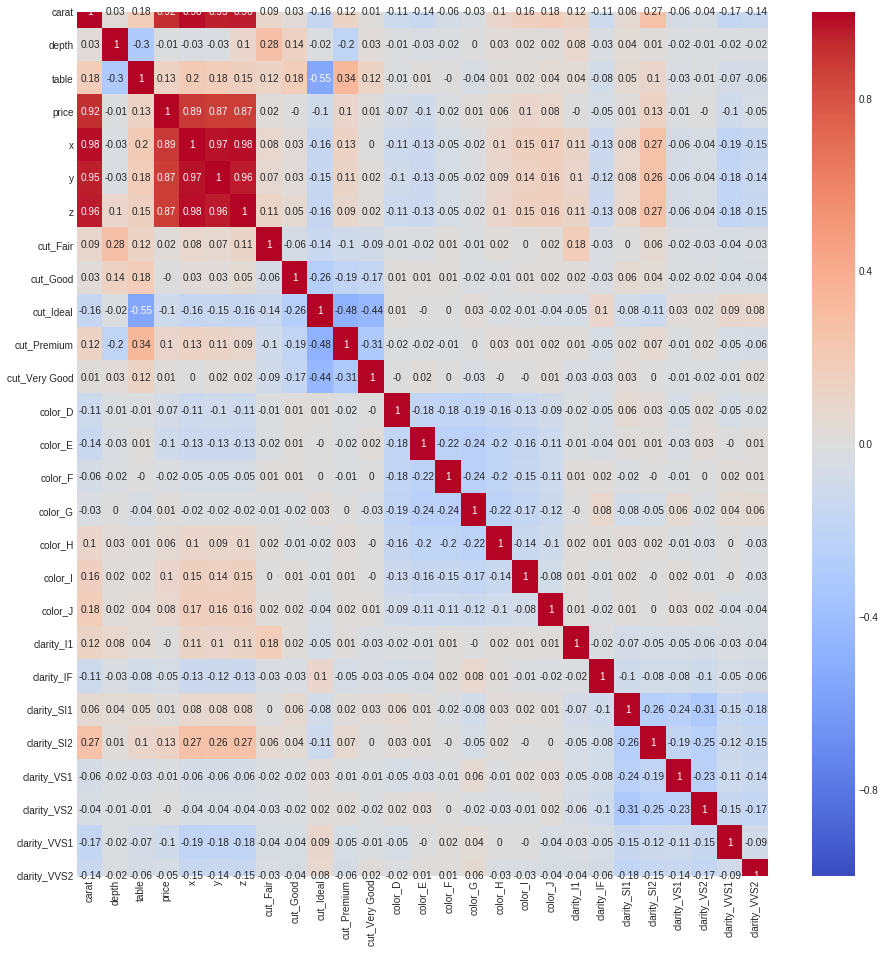

In [205]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,3])
sns.heatmap(diamonds_one_hot.corr().round(2),vmin=-1,vmax=1,cmap='coolwarm',annot=True);

#### Pair plot
The following plot shows the correlation between the features including the variable of interest. This plot illustrates more in detail the results of the heatmap. 

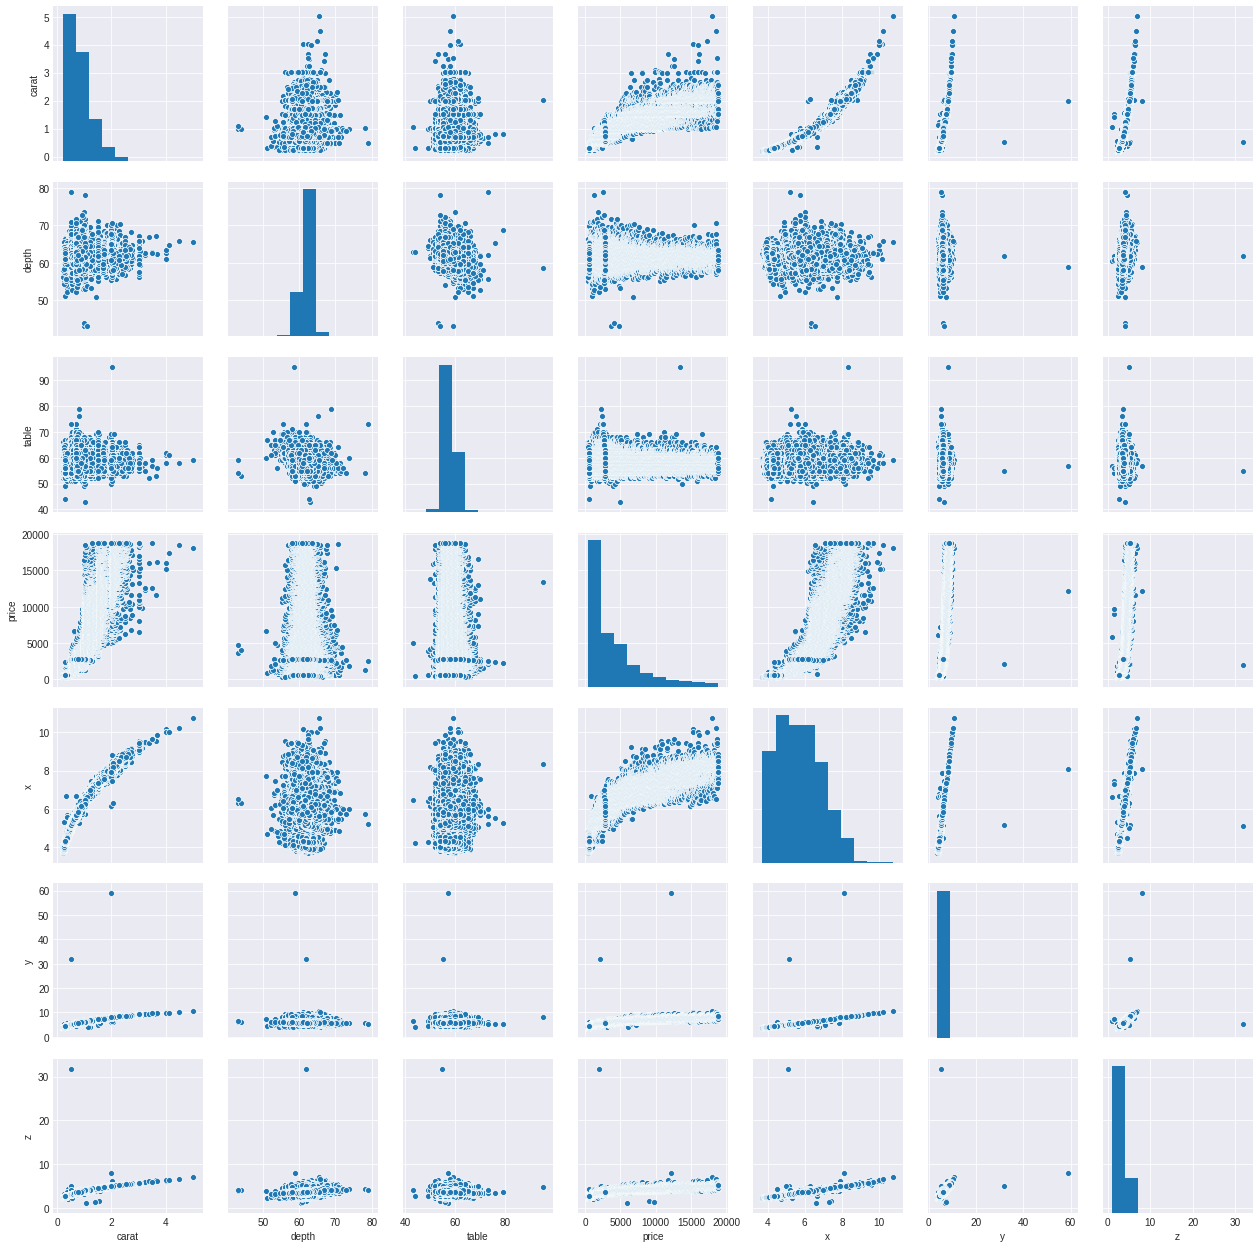

In [203]:
sns.pairplot(diamonds)

# Hypotheses and Modeling <a id="4"></a>

In order to create a prediction, different models will be used. Two main approaches will be tested, the first one is the linear regression model, for which a simple linear regressor and a Lasso regressor will be tested. The second approach tested will be the decision trees as regressors, and for this experiment, a simple decision tree and the random forest approach will be used. These four models explore a simple model and a more complex one for both types of regressors. 

As the heatmap shows that there are come variables correlated, it is possible to hypothesize that some information is repeated within the features. In order to test this, different sets of features will be tested. Since the dataset increased its size when encoding the categorical values, three different approaches will be explored for feature selection. In the first one, in an arbitrary way, the features are more correlated with the price of the diamond swill be tested. For a second experiment, the principal components will be obtained by using the PCA algorithm. Finally, the entire dataset will be introduced to the models. 

All the models will be split between a training set and a test set by using 30% of the data for testing. The implemented metrics for measuring the performance of the algorithms will be the r2 score, the mean squared error, and the mean absolute error.  

In [247]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

### Arbitrary Feature Selection

As we can visualize in the heatmap, there are four features that are highly correlated with the price of the diamond. These fetures are: carat, x, y and z. For a first approach, three estimators will be trained by using only this four features. 

In [308]:
x_reduced = diamonds[['carat','x','y','z']]
y = diamonds.price

In [309]:
x_reduced.head()

,carat,x,y,z
0,0.23,3.95,3.98,2.43
1,0.21,3.89,3.84,2.31
2,0.23,4.05,4.07,2.31
3,0.29,4.20,4.23,2.63
4,0.31,4.34,4.35,2.75


In [310]:
models = ['Linear Regression', 'Lasso Regression', 'Random Tree', 'Random Forest']
scores_arb = []
train_x_reduced, test_x_reduced, train_y, test_y =  train_test_split(x_reduced, y,test_size=0.3, random_state=15) 

#### Linear model

In [311]:
regression = linear_model.LinearRegression()
regression.fit(train_x_reduced,train_y)
pred_y = regression.predict(test_x_reduced)
print('Mean squarred error: ',mean_squared_error(test_y,pred_y))
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))
print('R2 score: ', r2_score(test_y,pred_y))
scores_arb.append(r2_score(test_y,pred_y))
results = cross_val_score(regression, x_reduced, y, cv=5, scoring='r2')

Mean squarred error:  2199681.6862241803
Mean absolute error:  897.4536808423379
R2 score:  0.86160337085349


#### Lasso Regression

In [312]:
lasso_reg = linear_model.Lasso(alpha=0.15)
lasso_reg.fit(train_x_reduced,train_y)
pred_y = lasso_reg.predict(test_x_reduced)
print('Mean squarred error: ',mean_squared_error(test_y,pred_y))
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))
print('R2 score: ', r2_score(test_y,pred_y))
scores_arb.append(r2_score(test_y,pred_y))

Mean squarred error:  2200153.3602036927
Mean absolute error:  898.1456434673728
R2 score:  0.8615736947011496


#### Decision Tree Regressor

In [313]:
dt = DecisionTreeRegressor(max_depth=10,random_state=36)
dt.fit(train_x_reduced, train_y)
pred_y = dt.predict(test_x_reduced)
print('Mean squarred error: ',mean_squared_error(test_y,pred_y))
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))
print('R2 score: ', r2_score(test_y,pred_y))
scores_arb.append(r2_score(test_y,pred_y))

Mean squarred error:  1965904.6330924765
Mean absolute error:  795.9104304212674
R2 score:  0.8763118426873255


#### Random Forest

In [314]:
rf = RandomForestRegressor(max_depth=10,n_estimators=10)
rf.fit(train_x_reduced, train_y)
pred_y = rf.predict(test_x_reduced)
print('Mean squarred error: ',mean_squared_error(test_y,pred_y))
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))
print('R2 score: ', r2_score(test_y,pred_y))
scores_arb.append(r2_score(test_y,pred_y))

Mean squarred error:  1849168.2036300614
Mean absolute error:  776.9548066860051
R2 score:  0.8836565091621962


### PCA feature selection

In this experiment, the 10 principal components of the dataser were used to describe the original data.

In [315]:
x_full = diamonds_one_hot.drop(['price'] , axis = 1)
y = diamonds_one_hot[['price']]
pca = PCA(n_components=12 , svd_solver='full')
pca.fit(x_full)
train_x_full, test_x_full, train_y, test_y =  train_test_split(x_full, y,test_size=0.3, random_state=15)
train_x_pca = pca.transform(train_x_full)
test_x_pca = pca.transform(test_x_full)

In [316]:
scores_pca = []

#### Linear model 

In [317]:
regression = linear_model.LinearRegression()
regression.fit(train_x_pca,train_y)
pred_y = regression.predict(test_x_pca)
print('Mean squarred error: ',mean_squared_error(test_y,pred_y))
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))
print('R2 score: ', r2_score(test_y,pred_y))
scores_pca.append(r2_score(test_y,pred_y))

Mean squarred error:  3069965.593121405
Mean absolute error:  1296.2770194372083
R2 score:  0.8068480124444387


#### Lasso regression

In [318]:
lasso_reg = linear_model.Lasso(alpha=0.15)
lasso_reg.fit(train_x_pca,train_y)
pred_y = lasso_reg.predict(test_x_pca)
print('Mean squarred error: ',mean_squared_error(test_y,pred_y))
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))
print('R2 score: ', r2_score(test_y,pred_y))
scores_pca.append(r2_score(test_y,pred_y))

Mean squarred error:  3069982.242871351
Mean absolute error:  1296.2412197184767
R2 score:  0.8068469648977491


#### Decission Tree

In [319]:
dt = DecisionTreeRegressor(max_depth=10,random_state=36)
dt.fit(train_x_pca, train_y)
pred_y = dt.predict(test_x_pca)
print('Mean squarred error: ',mean_squared_error(test_y,pred_y))
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))
print('R2 score: ', r2_score(test_y,pred_y))
scores_pca.append(r2_score(test_y,pred_y))

Mean squarred error:  1712445.177833354
Mean absolute error:  693.0085189153729
R2 score:  0.8922586655630416


#### Random Forest

In [320]:
rf = RandomForestRegressor(max_depth=10,n_estimators=10)
rf.fit(train_x_pca, train_y)
pred_y = rf.predict(test_x_pca)
print('Mean squarred error: ',mean_squared_error(test_y,pred_y))
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))
print('R2 score: ', r2_score(test_y,pred_y))
scores_pca.append(r2_score(test_y,pred_y))

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean squarred error:  1164517.2382592808
Mean absolute error:  594.9273331031866
R2 score:  0.9267324625342802


### No feature selection at all

In [321]:
x_full = diamonds_one_hot.drop(['price'] , axis = 1)
y = diamonds_one_hot.price
train_x_full, test_x_full, train_y, test_y =  train_test_split(x_full, y,test_size=0.3, random_state=15) 
scores_full = []

#### Linear Model

In [322]:
regression = linear_model.LinearRegression()
regression.fit(train_x_full,train_y)
pred_y = regression.predict(test_x_full)
print('Mean squarred error: ',mean_squared_error(test_y,pred_y))
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))
print('R2 score: ', r2_score(test_y,pred_y))
scores_full.append(r2_score(test_y,pred_y))

Mean squarred error:  1198075.9655303464
Mean absolute error:  733.0279867367581
R2 score:  0.9246210594336185


#### Lasso Regression

In [323]:
lasso_reg = linear_model.Lasso(alpha=0.15)
lasso_reg.fit(train_x_full,train_y)
pred_y = lasso_reg.predict(test_x_full)
print('Mean squarred error: ',mean_squared_error(test_y,pred_y))
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))
print('R2 score: ', r2_score(test_y,pred_y))
scores_full.append(r2_score(test_y,pred_y))

Mean squarred error:  1198174.7858055192
Mean absolute error:  732.9403524477781
R2 score:  0.9246148419917674


/home/eric/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79513397.96762085, tolerance: 60007903.07632679
  positive)


#### Decission Tree

In [324]:
dt = DecisionTreeRegressor(max_depth=10,random_state=36)
dt.fit(train_x_pca, train_y)
pred_y = dt.predict(test_x_pca)
print('Mean squarred error: ',mean_squared_error(test_y,pred_y))
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))
print('R2 score: ', r2_score(test_y,pred_y))
scores_full.append(r2_score(test_y,pred_y))

Mean squarred error:  1712445.177833354
Mean absolute error:  693.0085189153729
R2 score:  0.8922586655630416


#### Random Forest 

In [325]:
rf = RandomForestRegressor(max_depth=10,n_estimators=10)
rf.fit(train_x_full, train_y)
pred_y = rf.predict(test_x_full)
print('Mean squarred error: ',mean_squared_error(test_y,pred_y))
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))
print('R2 score: ', r2_score(test_y,pred_y))
scores_full.append(r2_score(test_y,pred_y))

Mean squarred error:  479897.7448549145
Mean absolute error:  371.95152133653767
R2 score:  0.9698064357952911


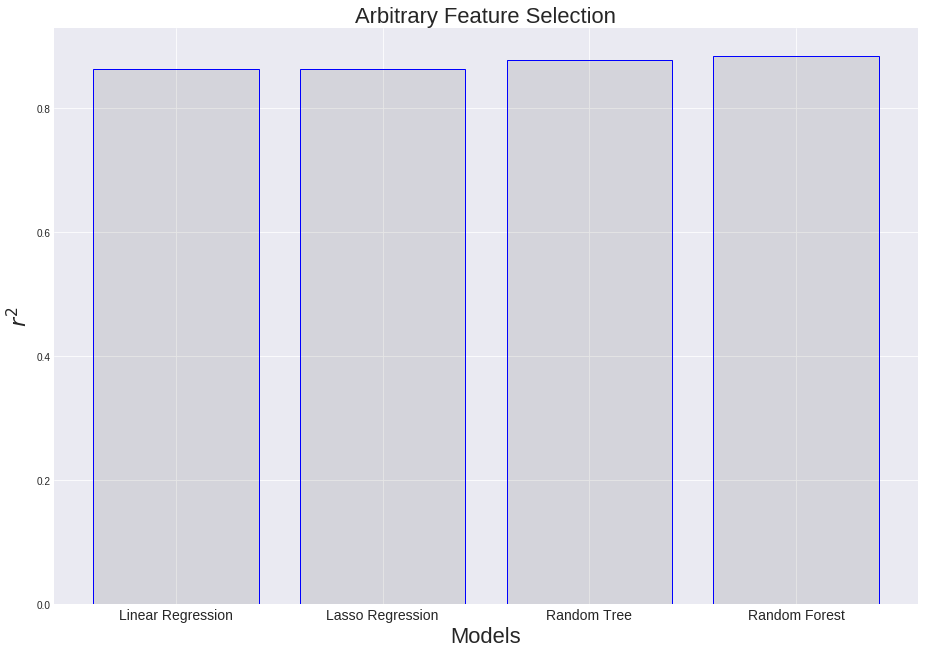

In [336]:
fig=plt.figure()
plt.style.use('seaborn-darkgrid')
axes=fig.add_axes([0.1,0.1,2,2])
y_pos = np.arange(len(models))
plt.bar(y_pos, scores_arb, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.xticks(y_pos, models, fontsize=14)
plt.ylabel('$r^2$',fontsize = 22)
plt.xlabel('Models',fontsize = 22)
plt.title('Arbitrary Feature Selection',fontsize = 22)
plt.show()


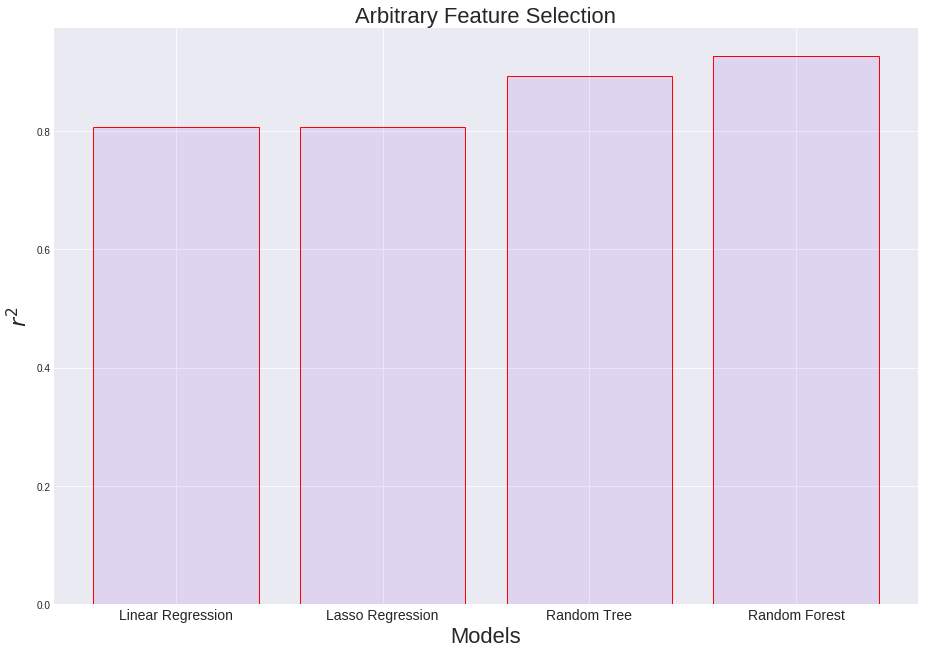

In [341]:
fig=plt.figure()
plt.style.use('seaborn-darkgrid')
axes=fig.add_axes([0.1,0.1,2,2])
y_pos = np.arange(len(models))
plt.bar(y_pos, scores_pca, color=(0.5, 0.1, 0.9, 0.1),  edgecolor='red')
plt.xticks(y_pos, models, fontsize=14)
plt.ylabel('$r^2$',fontsize = 22)
plt.xlabel('Models',fontsize = 22)
plt.title('PCA',fontsize = 22)
plt.show()


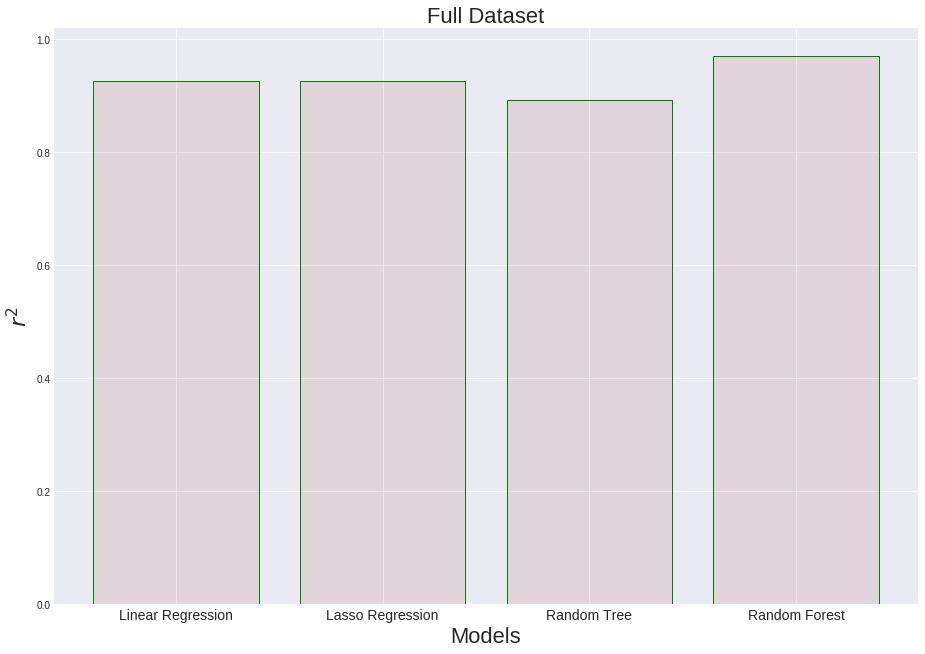

In [344]:
fig=plt.figure()
plt.style.use('seaborn-darkgrid')
axes=fig.add_axes([0.1,0.1,2,2])
y_pos = np.arange(len(models))
plt.bar(y_pos, scores_full, color=(0.6, 0.1, 0.1, 0.1),  edgecolor='green')
plt.xticks(y_pos, models, fontsize=14)
plt.ylabel('$r^2$',fontsize = 22)
plt.xlabel('Models',fontsize = 22)
plt.title('Full Dataset',fontsize = 22)
plt.show()

# Conclussions and next steps <a id="5"></a>

As it was possible to visualize, the random forest algorithm outperforms the rest of the models when using the entire dataset. As the difference in size between the original data and the one with the one-hot encoding is approximately 2Mb, it is worthy to use this method that ensures good performance. There are some simpler methods with good performance that use fewer resources than the random forest with the full data, nevertheless, the difference is not significant, since the dataset is quite small and the model is not that complex. 

As future work, it will be necessary to perform a more detailed review of the performance of the algorithm. To ensure that the model is not overfitted by analyzing the error curves within the training of the model or performing a k-fold validation to the models. Another possible analysis could be to test some different approaches for the regression task, those could be support vector machines, neural networks or some different trees with different optimizers. These tasks could be reviewed in a more detailed manner in future work. 